# Show Me Your Sound 

The `librosa` Python library is specifically designed for audio analysis and music information retrieval. It provides a comprehensive set of tools and functions for working with audio data, making it easier to extract meaningful information from audio files. Librosa allows users to load audio files, perform various audio analysis tasks such as feature extraction, pitch estimation, and beat tracking, and visualize the results. It is widely used in fields like music signal processing, sound analysis, and machine learning applications related to audio data. With its user-friendly interface and extensive functionality, Librosa is an essential tool for researchers, musicians, and developers working with audio and music-related projects in Python.

Here are some technical terms that we will be dealing with:

1. **Mel spectrogram**, often referred to as a "Mel-scaled spectrogram," is a representation of audio data that visualizes its frequency content over time. It is derived from the traditional spectrogram, which is a time-frequency representation of audio signals.
2. **Mel Scale** is a perceptual scale of pitch (or frequency) based on how humans perceive differences in pitch. It is not linear like the traditional frequency scale (Hz). Instead, it is designed to be more consistent with human hearing. For example, small frequency changes in the low-frequency range are more perceptually significant than in the high-frequency range.
3. **Mel Filter Banks**: In Mel spectrogram computation, the continuous spectrum is divided into a set of triangular frequency bands, known as Mel filter banks. These filter banks are designed to mimic the frequency resolution of the human auditory system. Each filter bank has a unique shape, and together they cover the entire Mel scale.

To create a Mel spectrogram, you apply these Mel filter banks to the original audio signal. At each time step, the energy in each filter bank is computed. This results in a set of values that represent how much energy is present in each Mel-filtered frequency band at that moment in time. These values are then used to create the Mel spectrogram.

The main advantage of using a Mel spectrogram is that it provides a more perceptually relevant representation of audio data. By applying the Mel scale and filter banks, it can help to highlight important features of the audio, particularly in the context of speech and music analysis. Mel spectrograms are commonly used in tasks such as speech recognition, music genre classification, and sound event detection.

Let's do exactly that:

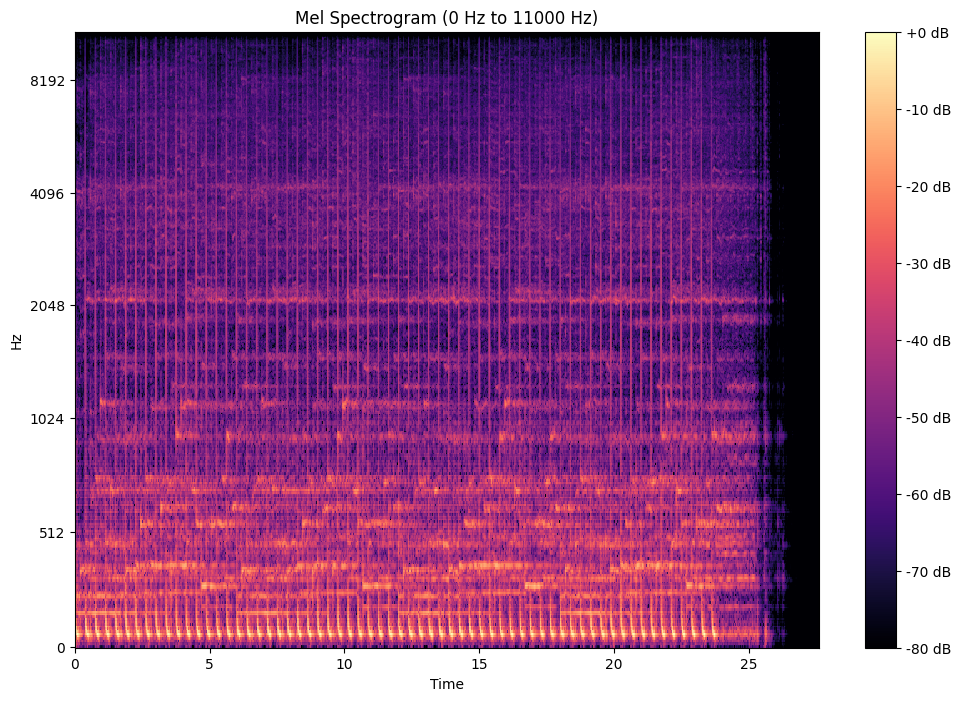

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Path to the audio file
audio_file = "../_Data/Sample.wav"

# Load the audio file
y, sr = librosa.load(audio_file)

# Adjust the frequency range from 0 Hz to 11 KHz
fmin = 0
fmax = 11000

# Increase the number of mel filter banks (adjust n_mels)
n_mels = 512  # You can change this value to increase the frequency resolution
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmin=fmin, fmax=fmax)

# Convert to decibels
db_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(db_spectrogram, x_axis='time', y_axis='mel', sr=sr, fmin=fmin, fmax=fmax)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel Spectrogram ({fmin} Hz to {fmax} Hz)')
plt.show()

1. **Loading**: The script loads the audio file using `librosa.load()`. It reads the audio waveform into `y` and stores the sample rate in `sr`.
2. **Frequency Range Adjustment**: The frequency range for the spectrogram is adjusted. `fmin` is set to 0 Hz (the lower bound), and `fmax` is set to 11,000 Hz (or 11 KHz, the upper bound). This determines the range of frequencies that will be analyzed.
3. **Mel Filter Banks**: The number of Mel filter banks used for the Mel spectrogram is determined by `n_mels`, which is set to 512 in this example. Increasing this value results in a higher frequency resolution in the spectrogram.
4. **Spectrogram Calculation**: The Mel spectrogram is computed using librosa.feature.melspectrogram(). It takes the audio waveform `y`, the sample rate `sr`, and parameters for the frequency range and filter banks. The result is stored in `spectrogram`.
5. **Conversion to Decibels**: The spectrogram is then converted to decibels using `librosa.power_to_db()`. This transformation enhances the visualization of the spectrogram, as human perception of loudness is better represented on a logarithmic scale.
6. **Plotting the Spectrogram**: Finally, the script uses `matplotlib` to create a figure and display the Mel spectrogram using `librosa.display.specshow()`. The spectrogram is shown with time on the x-axis and Mel frequency on the y-axis. A color bar is included to indicate dB levels, and the title of the plot displays the frequency range used for analysis.
7. **Displaying the Plot**: The `plt.show()` function displays the generated spectrogram as a graphical plot.